In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
color_label = {"left_iris": [170, 240, 209],
                     "left_pupil": [184, 61, 245],
                     "right_iris": [245, 147, 49],
                     "right_pupil": [250, 50, 83]}


In [48]:
table = {'left_eye': 1,
             'right_eye': 2,
             'upper_lip': 3,
             'lower_lip': 4,
             'left_iris': 6,
             'right_iris': 7}

In [49]:
mask_iris_mouth_eye = cv2.imread("original_datas/mask_iris.png", 0)
img_resize = cv2.cvtColor(cv2.imread("original_datas/IMG_0350_resize.jpg"), cv2.COLOR_BGR2RGB)
H = 1024
W = 1024
color_img = np.zeros((H, W, 3)).astype(np.uint8)

In [50]:
for i in range(H):
    for j in range(W):
        if mask_iris_mouth_eye[i, j] == table["left_eye"] or mask_iris_mouth_eye[i, j] == table["right_eye"]:
            color_img[i, j, 0] = 255
            color_img[i, j, 1] = 255
            color_img[i, j, 2] = 255
        elif mask_iris_mouth_eye[i, j] == table["upper_lip"] or mask_iris_mouth_eye[i, j] == table["lower_lip"]:
            color_img[i, j, 0] = 255
            color_img[i, j, 1] = 79
            color_img[i, j, 2] = 140
        elif mask_iris_mouth_eye[i, j] == table["left_iris"] or mask_iris_mouth_eye[i, j] == table["right_iris"]:
            color_img[i, j, 0] = 0
            color_img[i, j, 1] = 70
            color_img[i, j, 2] = 255

In [51]:
#img = cv2.cvtColor(cv2.imread("original_datas/IMG_0350.jpg"), cv2.COLOR_BGR2RGB)

mask = cv2.cvtColor(cv2.imread("cvat_datas/SegmentationClass/IMG_0350.png"), cv2.COLOR_BGR2RGB)
mask = cv2.resize(mask, (1024, 1024))

(3088, 2316, 3) (1024, 1024, 3)
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  93  94  95  97  98  99 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 116 118 119 120 121 122 124 125 126 128 129 130 131 132 133
 134 135 136 137 138 140 141 142 143 144 145 146 147 149 150 151 152 153
 155 157 159 160 162 164 166 167 169 170 171 172 173 174 175 177 178 179
 180 181 182 183 184 187 188 189 191 192 194 196 200 203 204 205 207 208
 209 210 211 212 214 215 216 217 218 219 220 221 224 225 226 227 228 229
 231 233 234 235 237 238 239 240 241 243 244 245 246 247 248 249 250]


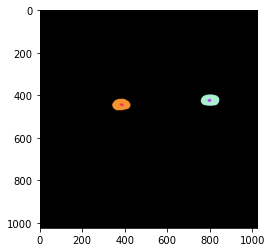

In [52]:
print(img.shape, mask.shape)
plt.imshow(mask)
print(np.unique(mask))

In [53]:
for i in range(H):
    for j in range(W):
        if np.all(mask[i, j] == color_label["left_pupil"]) or np.all(mask[i, j] == color_label["right_pupil"]):
            color_img[i, j, 0] = 255
            color_img[i, j, 1] = 255
            color_img[i, j, 2] = 255

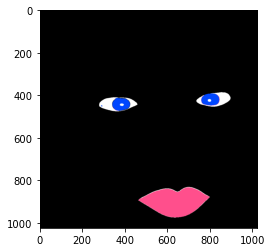

In [54]:
plt.imshow(color_img)

In [57]:
cv2.imwrite("final_img.png", cv2.cvtColor(color_img, cv2.COLOR_RGB2BGR))

True